In [ ]:
import numpy as np
import pandas as pd
import scipy
import operator
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, tree
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:


from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

In [ ]:

df = pd.read_csv('data/playgolf.csv')
df.head() 

,Outlook,Temperature,Humidity,Windy,Result
0,sunny,85,85,False,Don't Play
1,sunny,80,90,True,Don't Play
2,overcast,83,78,False,Play
3,rain,70,96,False,Play
4,rain,68,80,False,Play


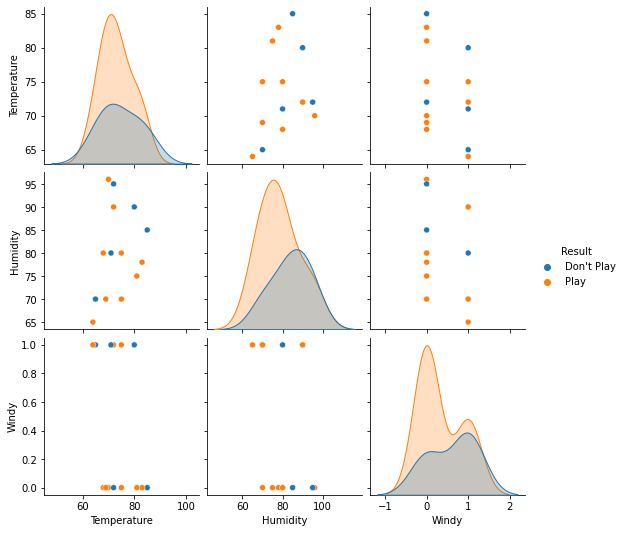

In [ ]:
sns.pairplot(data=df, hue = 'Result')

In [ ]:
pd.get_dummies(data=df['Outlook','Windy'] )

KeyError: ignored

df2

In [ ]:
df2=df.join(pd.get_dummies(data=df['Outlook']))
df3=df2.join(pd.get_dummies(data=df['Windy']))

In [ ]:
!cd /content/data
!ls
!cd data
!ls 

assignment.md  data  readme.md	sample_data
assignment.md  data  readme.md	sample_data


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


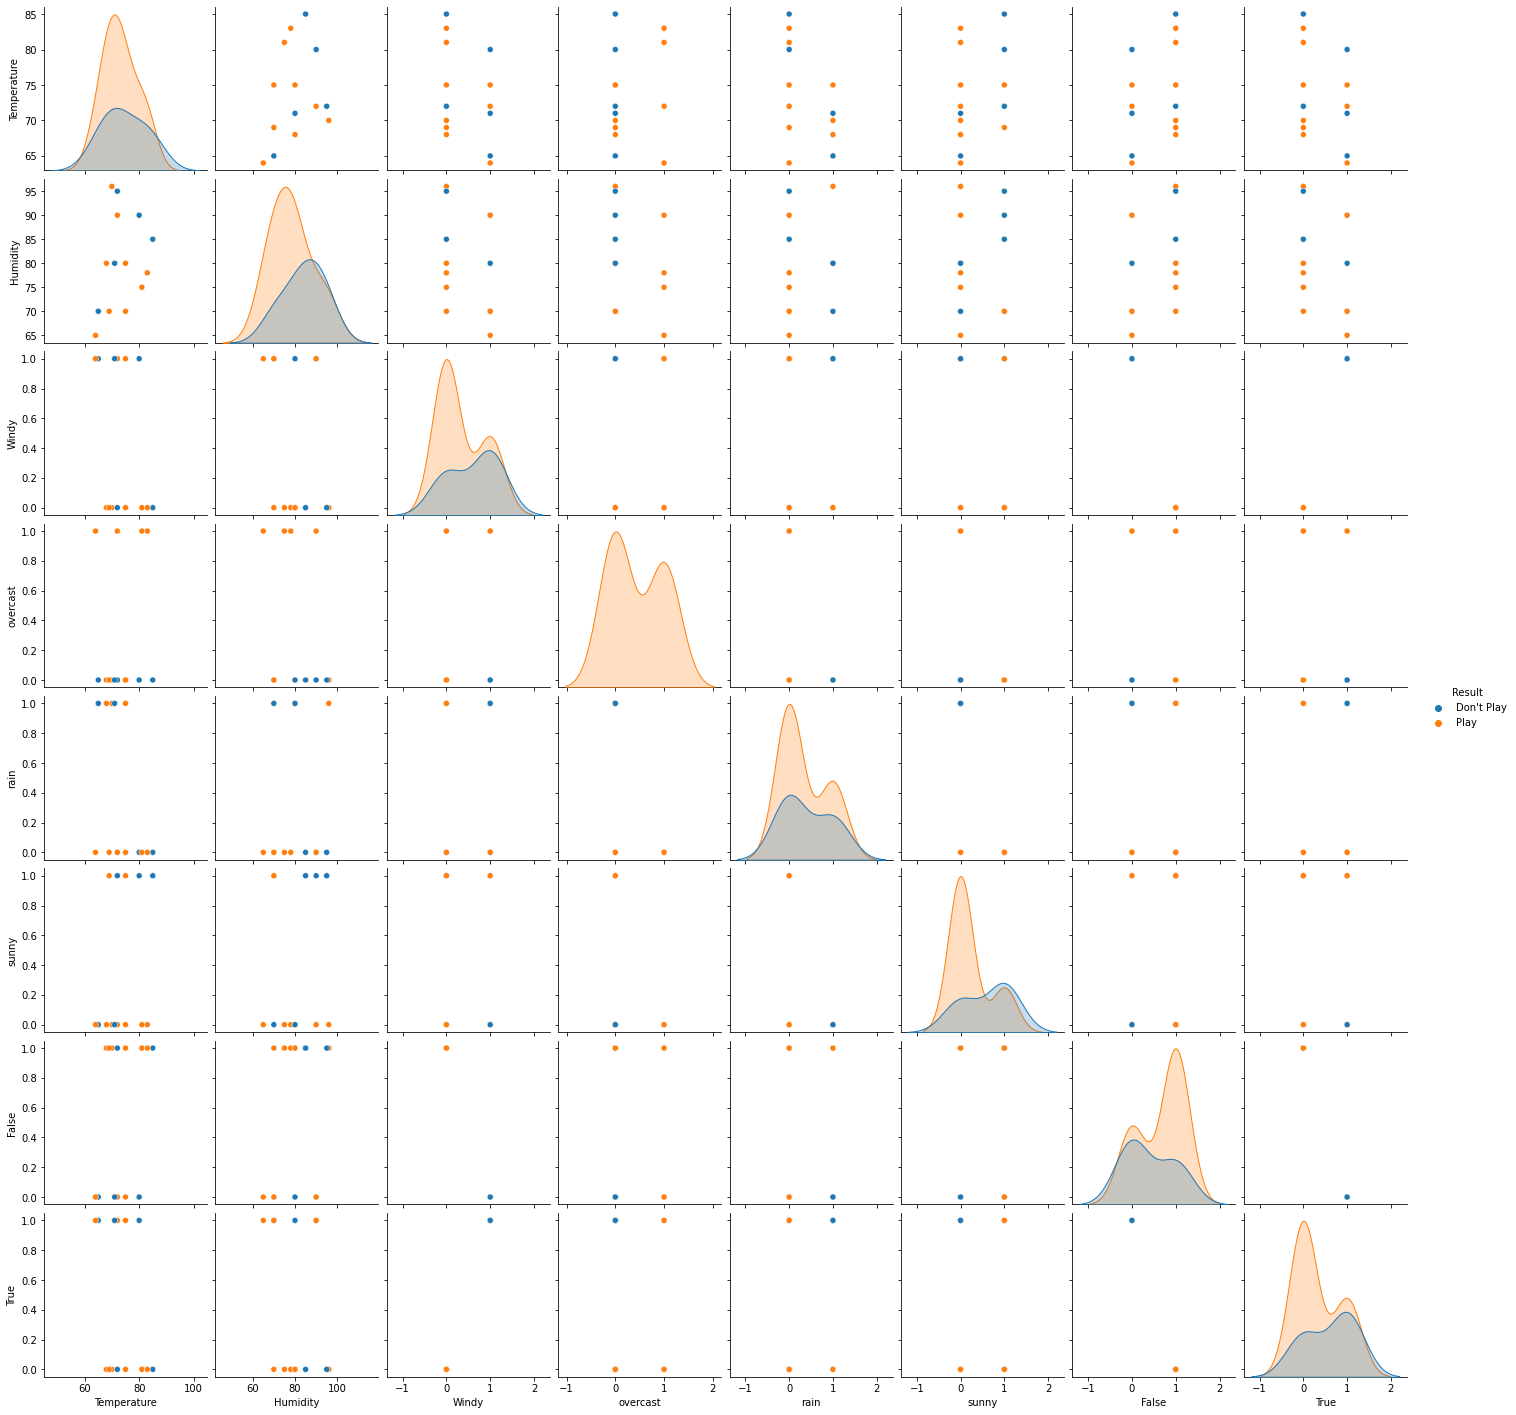

In [ ]:
sns.pairplot(data=df3, hue = 'Result')

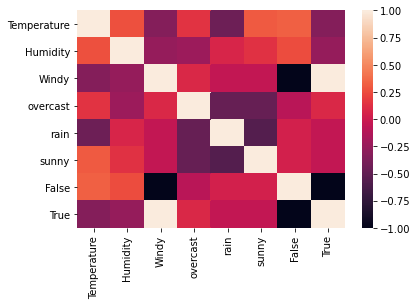

In [ ]:
sns.heatmap(df3.corr())

In [ ]:
#label encoding
le = LabelEncoder()
Result = le.fit_transform(df['Result'])
Result

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
le = LabelEncoder()
df5=df
df5['Windy'] = le.fit_transform(df['Windy'])
df5['Outlook'] = le.fit_transform(df['Outlook'])
df5

,Outlook,Temperature,Humidity,Windy,Result
0,2,85,85,0,Don't Play
1,2,80,90,1,Don't Play
2,0,83,78,0,Play
3,1,70,96,0,Play
4,1,68,80,0,Play
5,1,65,70,1,Don't Play
6,0,64,65,1,Play
7,2,72,95,0,Don't Play
8,2,69,70,0,Play
9,1,75,80,0,Play


In [ ]:
X=df5.iloc[:,:4]
X
y=Result

In [ ]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (11, 4)
Testing split input-  (3, 4)


In [ ]:
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [ ]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



Text(0.5, 1.0, 'Accuracy Score: 0.6666666666666666')

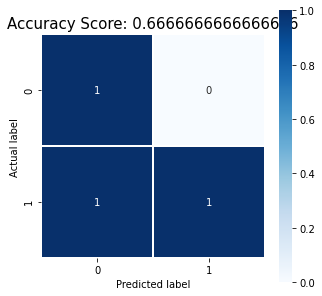

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')

plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)